In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 14

### Exercise #1 (1 point):

Open the CSV file, and feed the data into a pandas.core.frame.DataFrame object.
Do a sanity check of the dataset: Is the definition for all variables clear? Do all variables
have the same number of entries? Are there any null values that need to be discarded?


Reproduce the scatter plot of Fig. 1. Make sure to zoom in the plot in a way that allows
you to see clearly the different momentum resolution bands.

In [3]:
#read in datafile
data = pd.read_csv('mc-chic1.csv')

In [4]:
#drop extra index at column 0
data.drop(data.columns[0], axis=1, inplace=True)

In [5]:
#check dataframe
data

,ep,eta,p,phi,pol,pt,qp,tx,ty,zV
0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975
1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975
2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975
3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975
4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373
...,...,...,...,...,...,...,...,...,...,...
208979,0.007196,4.140301,7.805385,0.284841,-1.0,0.248430,-7.805385,0.030561,0.008948,-10.3122
208980,0.007210,3.852298,160.216980,2.341455,-1.0,6.800037,160.216980,-0.029593,0.030478,-47.0282
208981,0.004592,4.234431,32.691210,1.112678,-1.0,0.947065,-32.691210,0.012818,0.025994,-47.0282
208982,0.003816,4.122482,14.349394,2.564155,-1.0,0.464920,14.349394,-0.027161,0.017696,-47.0282


- **ep** estimate of relative muon track fit momentum error (σp/p)
- **eta** muon track η
- **p** muon track momentum magnitude in GeV/c
- **phi** muon track φ in rad
- **pol** magnet polarity (+ or −)
- **pt** muon track transverse momentum in GeV/c
- **qp** muon charge × momentum in GeV/c
- **tx** ratio of x- to z-momentum components of muon track (px/pz)
- **ty** ratio of y- to z-momentum components of muon track (py/pz)
- **zV** z-component of χc1 decay vertex in mm

In [6]:
#checking lengths are the same

In [7]:
len(data['ep'])==len(data['eta'])==len(data['p'])==len(data['phi'])==len(data['pol'])==len(data['pt'])==len(data['qp'])

True

In [8]:
len(data['tx'])==len(data['ty'])==len(data['zV'])

True

In [9]:
#checking for null values

In [10]:
data.isnull().sum()

ep     0
eta    0
p      0
phi    0
pol    0
pt     0
qp     0
tx     0
ty     0
zV     0
dtype: int64

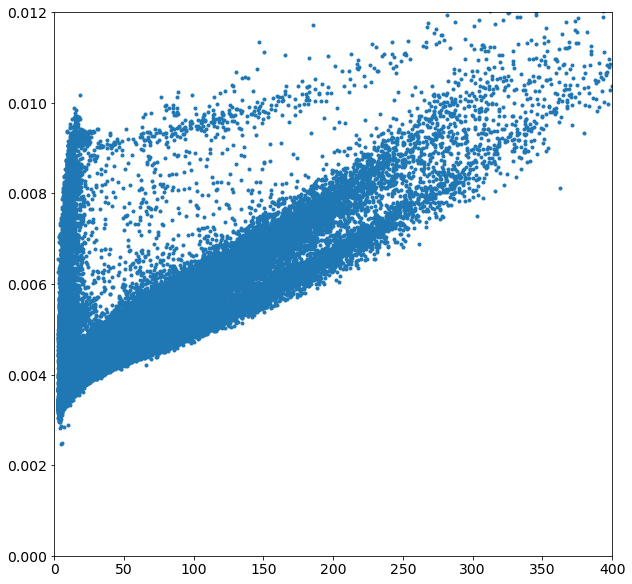

In [11]:
#Reproduce the scatter plot of Fig. 1 in a way that allows you to see clearly the different momentum resolution bands.

plt.scatter(data['p'],data['ep'],marker='.')
#zooming in to see the bands by cutting the axes
plt.axis([0, 400, 0, 0.012])
plt.show()

In [12]:
#copying data incase of errors
data2 = data.copy()

### Exercise #2 (1 point):
Demonstrate that pT << pz in two ways:
- Plot the 1D distributions for p and pT in log scale.
- Use the “data-appending” method (pandas.DataFrame.append) to add the variables pz and epz (= ep * p/pz, i.e. effectively σpz /pz) in the DataFrame object.

Create the σpz /pz vs. pz scatter plot and demonstrate that it is
qualitatively identical to Fig. 1.

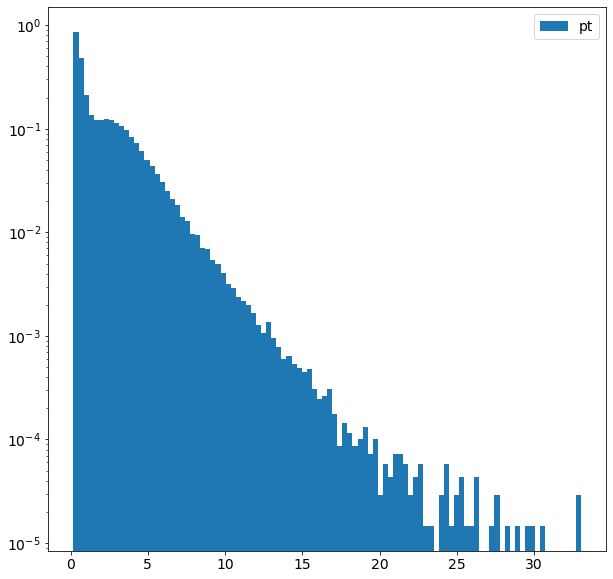

In [141]:
plt.hist(data['pt'],log=True,density=True,label='pt',bins=100)

plt.legend()

In [14]:
#pz ≡ root(p2 − pt2)
pz = np.sqrt(data['p']**2 - data['pt']**2)

In [15]:
#print pz values
pz

0          71.845851
1          37.627791
2          18.536851
3           8.617790
4          43.242050
             ...    
208979      7.801430
208980    160.072609
208981     32.677489
208982     14.341860
208983     12.048640
Length: 208984, dtype: float64

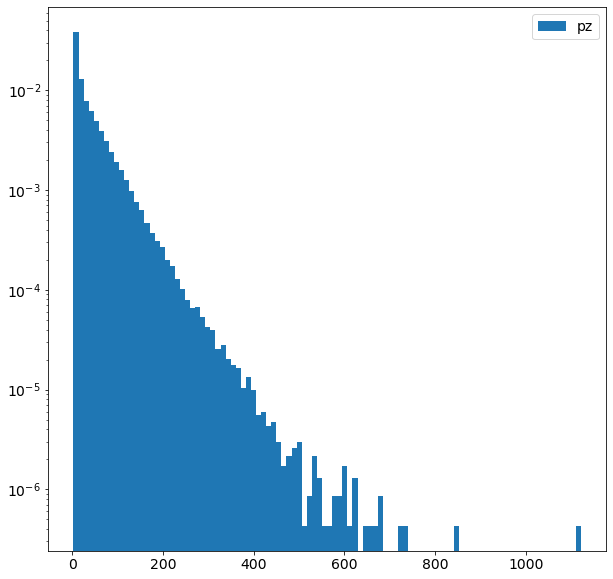

In [144]:
plt.hist(pz,log=True,density=True,label='pz',bins=100)
plt.legend()

by plotting these two histograms you can see that pt is much smaller than pz as it has entries only going up to 30 whereas pz has entries going up to ~1000 and has much less entries (by 2 orders of magnitude) at the smaller values near 0.

In [16]:
#get epz values
epz = data['ep'] * data['p']/pz

In [17]:
epz

0         0.005477
1         0.004052
2         0.003908
3         0.003866
4         0.004989
            ...   
208979    0.007200
208980    0.007216
208981    0.004594
208982    0.003818
208983    0.004140
Length: 208984, dtype: float64

In [18]:
#add new values to dataframe
data['epz'] = epz

In [19]:
data['pz'] = pz

In [20]:
data

,ep,eta,p,phi,pol,pt,qp,tx,ty,zV,epz,pz
0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975,0.005477,71.845851
1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975,0.004052,37.627791
2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975,0.003908,18.536851
3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975,0.003866,8.617790
4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373,0.004989,43.242050
...,...,...,...,...,...,...,...,...,...,...,...,...
208979,0.007196,4.140301,7.805385,0.284841,-1.0,0.248430,-7.805385,0.030561,0.008948,-10.3122,0.007200,7.801430
208980,0.007210,3.852298,160.216980,2.341455,-1.0,6.800037,160.216980,-0.029593,0.030478,-47.0282,0.007216,160.072609
208981,0.004592,4.234431,32.691210,1.112678,-1.0,0.947065,-32.691210,0.012818,0.025994,-47.0282,0.004594,32.677489
208982,0.003816,4.122482,14.349394,2.564155,-1.0,0.464920,14.349394,-0.027161,0.017696,-47.0282,0.003818,14.341860


(0.0, 400.0, 0.0, 0.012)

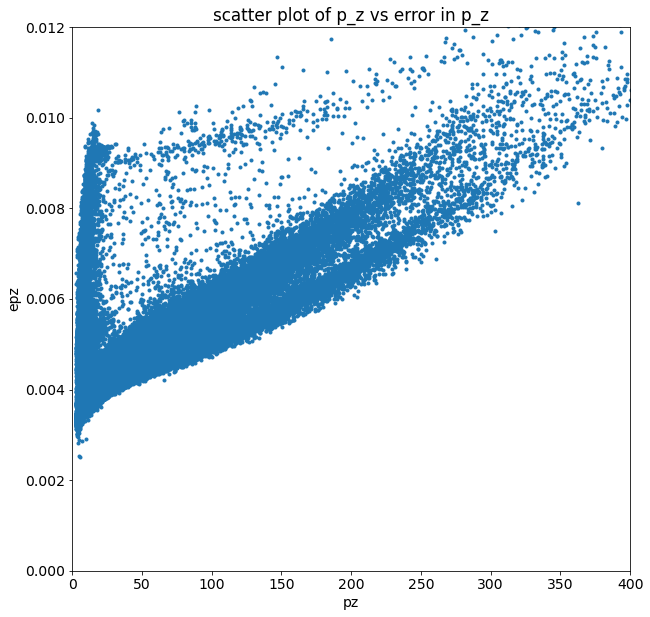

In [145]:
plt.scatter(data['pz'],data['epz'],marker='.')
plt.xlabel('pz')
plt.ylabel('epz')
plt.title('scatter plot of p_z vs error in p_z')
plt.axis([0, 400, 0, 0.012])

### Exercise #3 (2 points):

In [22]:
from tensorflow . keras . models import Sequential
from tensorflow . keras . layers import Dense
from tensorflow . keras . layers import Dropout

In [102]:
from tensorflow.keras.layers import LeakyReLU

In [23]:
#assign target data
target = data['ep'].to_numpy()

In [42]:
#assign inputs, put in numpy array
inputs = data[['p','tx','ty','eta','phi']].to_numpy()

In [43]:
len(inputs)

208984

In [44]:
# num of inputs = 5 (p, tx , ty , eta , phi ), num of outputs = 1 (ep)
num_inputs = 5; num_outputs = 1
# simple Keras model : use same # of nodes as # of inputs , single layer
num_nodes = num_inputs
def simple_model():
    # create model
    model = Sequential()
    # no activation required for the output , as this is a regression problem ,
    # ie. we need a numerical prediction for any input
    model.add(Dense(num_nodes, input_dim = num_inputs, kernel_initializer ='normal', \
                    activation ='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_outputs,kernel_initializer ='normal'))
    # Compile model
    model.compile(loss ='mean_squared_error', optimizer ='adam')
    return model


In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
N_epochs = 100
batchSize = 32
# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed( Answer_to_all_questions )
estimator = KerasRegressor ( build_fn = simple_model , epochs = N_epochs , batch_size = batchSize )
kfold = KFold( n_splits =10 , random_state = Answer_to_all_questions , shuffle = True )
# data and target are 5- column and 1- column arrays produced with pandas . DataFrame . values
results = cross_val_score ( estimator , inputs , target , cv = kfold , scoring ='r2')
print ('Standardised : %.2 f %s %.2f' % ( results . mean () , u'\ u00B1', results . std ()))


In [ ]:
# had to clear the output from the cell above as the verbose took up most of the page but it was run and returned the result below

In [53]:
print ('Standardised', results.mean(), results.std ())

Standardised 0.32179377447127405 0.12403564187635754


this is our R^2 value, we want it as near to 1 as possible. Clearly this model is not good for the task so we need to adapt the construction of it.

### Exercise #4 (3 points):
(a) (1 point) In the code of the previous example, we will be replacing the estimator created via the KerasRegressor call by a new “pipelined” estimator using the
sklearn.pipeline.Pipeline method.

In [63]:
#get standardised pipeline
estimators = []
estimators . append (( 'standardize', StandardScaler ()))
estimators . append (( 'mlp', KerasRegressor ( build_fn = simple_model , \
epochs = N_epochs , batch_size = batchSize )))
pipeline = Pipeline ( estimators )

In [65]:
N_epochs =100
batchSize = 100
# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed( Answer_to_all_questions )
kfold = KFold( n_splits =2 , random_state = Answer_to_all_questions , shuffle = True )
# data and target are 5- column and 1- column arrays produced with pandas . DataFrame . values
results = cross_val_score ( pipeline , inputs , target , cv = kfold , scoring ='r2')
print ('Standardised (pipelined)',results.mean() ,'+/-',results . std ())

Epoch 1/100
3266/3266 [==============================] - 2s 573us/step - loss: 3.6707e-06
Epoch 2/100
3266/3266 [==============================] - 2s 608us/step - loss: 4.7970e-07
Epoch 3/100
3266/3266 [==============================] - 2s 589us/step - loss: 4.7196e-07
Epoch 4/100
3266/3266 [==============================] - 2s 601us/step - loss: 4.5042e-07
Epoch 5/100
3266/3266 [==============================] - 2s 604us/step - loss: 4.5527e-07
Epoch 6/100
3266/3266 [==============================] - 2s 599us/step - loss: 4.7356e-07
Epoch 7/100
3266/3266 [==============================] - 2s 598us/step - loss: 4.5382e-07
Epoch 8/100
3266/3266 [==============================] - 2s 610us/step - loss: 4.6716e-07
Epoch 9/100
3266/3266 [==============================] - 2s 601us/step - loss: 4.4407e-07
Epoch 10/100
3266/3266 [==============================] - 2s 609us/step - loss: 4.5863e-07
Epoch 11/100
3266/3266 [==============================] - 2s 609us/step - loss: 4.4305e-07
Epoch 12

3266/3266 [==============================] - 2s 584us/step - loss: 4.6925e-07
Epoch 92/100
3266/3266 [==============================] - 2s 574us/step - loss: 4.4721e-07
Epoch 93/100
3266/3266 [==============================] - 2s 563us/step - loss: 4.5500e-07
Epoch 94/100
3266/3266 [==============================] - 2s 564us/step - loss: 4.5902e-07
Epoch 95/100
3266/3266 [==============================] - 2s 558us/step - loss: 4.4173e-07
Epoch 96/100
3266/3266 [==============================] - 2s 567us/step - loss: 4.6517e-07
Epoch 97/100
3266/3266 [==============================] - 2s 568us/step - loss: 4.6494e-07
Epoch 98/100
3266/3266 [==============================] - 2s 566us/step - loss: 4.5942e-07
Epoch 99/100
3266/3266 [==============================] - 2s 573us/step - loss: 4.5579e-07
Epoch 100/100
3266/3266 [==============================] - 2s 575us/step - loss: 4.5310e-07
Epoch 1/100
3266/3266 [==============================] - 2s 582us/step - loss: 5.7210e-06
Epoch 2/100


3266/3266 [==============================] - 2s 600us/step - loss: 4.4781e-07
Epoch 82/100
3266/3266 [==============================] - 2s 576us/step - loss: 4.5174e-07
Epoch 83/100
3266/3266 [==============================] - 2s 569us/step - loss: 4.5313e-07
Epoch 84/100
3266/3266 [==============================] - 2s 580us/step - loss: 4.4147e-07
Epoch 85/100
3266/3266 [==============================] - 2s 564us/step - loss: 4.3028e-07
Epoch 86/100
3266/3266 [==============================] - 3s 817us/step - loss: 4.5753e-07
Epoch 87/100
3266/3266 [==============================] - 2s 632us/step - loss: 4.8194e-07
Epoch 88/100
3266/3266 [==============================] - 2s 661us/step - loss: 4.6961e-07
Epoch 89/100
3266/3266 [==============================] - 2s 635us/step - loss: 4.5748e-07
Epoch 90/100
3266/3266 [==============================] - 2s 668us/step - loss: 4.4753e-07
Epoch 91/100
3266/3266 [==============================] - 2s 640us/step - loss: 4.5732e-07
Epoch 92/100

simple model with pipeline: standard deviation (0.0016) is much less and better R^2 (0.66) value with pipeline

(b) (1 point) We will now up our game and attempt to build a denser model, i.e. a
model with an additional NN layer.
Create a new denser model based on the simple model function, and by adding a new
layer. For the first layer, use the same number of nodes as the number of inputs. For the
second layer, choose a number of nodes anywhere between 2 and the number of inputs.
Run the new regressor and evaluate again its performance. Should you use standardised
inputs again? Only if the previous exercise has shown that this improves the performance!

In [66]:
def denser_model():
    # create model
    model = Sequential()
    # no activation required for the output , as this is a regression problem ,
    # ie. we need a numerical prediction for any input
    model.add(Dense(num_nodes, input_dim = num_inputs, kernel_initializer ='normal', \
                    activation ='relu'))
    model.add(Dropout(0.2))

    #number of nodes for second layer = 2 (can be between 2 and 5)
    model.add(Dense(2, kernel_initializer ='normal', \
                    activation ='relu'))
    #reduce drop out to 0.1
    model.add(Dropout(0.1))
    model.add(Dense(num_outputs,kernel_initializer ='normal'))
    # Compile model
    model.compile(loss ='mean_squared_error', optimizer ='adam')
    return model

In [68]:
N_epochs = 100
batchSize = 100
# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed( Answer_to_all_questions )
estimator = KerasRegressor ( build_fn = denser_model , epochs = N_epochs , batch_size = batchSize )
kfold = KFold( n_splits =2 , random_state = Answer_to_all_questions , shuffle = True )
# data and target are 5- column and 1- column arrays produced with pandas . DataFrame . values
results = cross_val_score ( estimator , inputs , target , cv = kfold , scoring ='r2')
print ('Standardised : %.2 f %s %.2f' % ( results . mean () , u'\ u00B1', results . std ()))

Epoch 1/100
1045/1045 [==============================] - 1s 675us/step - loss: 1.5615e-06
Epoch 2/100
1045/1045 [==============================] - 1s 656us/step - loss: 1.0922e-06
Epoch 3/100
1045/1045 [==============================] - 1s 621us/step - loss: 1.1155e-06
Epoch 4/100
1045/1045 [==============================] - 1s 660us/step - loss: 1.1040e-06
Epoch 5/100
1045/1045 [==============================] - 1s 625us/step - loss: 1.0940e-06
Epoch 6/100
1045/1045 [==============================] - 1s 643us/step - loss: 1.0853e-06
Epoch 7/100
1045/1045 [==============================] - 1s 658us/step - loss: 1.1020e-06
Epoch 8/100
1045/1045 [==============================] - 1s 670us/step - loss: 1.1018e-06
Epoch 9/100
1045/1045 [==============================] - 1s 664us/step - loss: 1.1151e-06
Epoch 10/100
1045/1045 [==============================] - 1s 642us/step - loss: 1.1276e-06
Epoch 11/100
1045/1045 [==============================] - 1s 647us/step - loss: 1.0986e-06
Epoch 12

1045/1045 [==============================] - 1s 611us/step - loss: 1.1167e-06
Epoch 92/100
1045/1045 [==============================] - 1s 596us/step - loss: 1.1137e-06
Epoch 93/100
1045/1045 [==============================] - 1s 591us/step - loss: 1.1423e-06
Epoch 94/100
1045/1045 [==============================] - 1s 579us/step - loss: 1.1308e-06
Epoch 95/100
1045/1045 [==============================] - 1s 598us/step - loss: 1.1565e-06
Epoch 96/100
1045/1045 [==============================] - 1s 605us/step - loss: 1.1208e-06
Epoch 97/100
1045/1045 [==============================] - 1s 605us/step - loss: 1.1127e-06
Epoch 98/100
1045/1045 [==============================] - 1s 595us/step - loss: 1.1180e-06
Epoch 99/100
1045/1045 [==============================] - 1s 588us/step - loss: 1.1202e-06
Epoch 100/100
1045/1045 [==============================] - 1s 591us/step - loss: 1.1187e-06
Epoch 1/100
1045/1045 [==============================] - 1s 596us/step - loss: 1.3886e-06
Epoch 2/100


1045/1045 [==============================] - 1s 756us/step - loss: 1.0338e-06
Epoch 82/100
1045/1045 [==============================] - 1s 857us/step - loss: 1.0284e-06
Epoch 83/100
1045/1045 [==============================] - 1s 820us/step - loss: 1.0461e-06
Epoch 84/100
1045/1045 [==============================] - 1s 948us/step - loss: 1.0416e-06
Epoch 85/100
1045/1045 [==============================] - 1s 575us/step - loss: 1.0165e-06
Epoch 86/100
1045/1045 [==============================] - 1s 584us/step - loss: 1.0141e-06
Epoch 87/100
1045/1045 [==============================] - 1s 590us/step - loss: 1.0474e-06
Epoch 88/100
1045/1045 [==============================] - 1s 833us/step - loss: 1.0484e-06
Epoch 89/100
1045/1045 [==============================] - 1s 704us/step - loss: 1.0300e-06
Epoch 90/100
1045/1045 [==============================] - 1s 685us/step - loss: 1.0187e-06
Epoch 91/100
1045/1045 [==============================] - 1s 796us/step - loss: 1.0229e-06
Epoch 92/100

ValueError: unsupported format character ' ' (0x20) at index 18

In [70]:
print ('Standardised (denser without pipeline)',results.mean() ,'+/-',results . std ())

Standardised (denser without pipeline) -0.01292976274576274 +/- 0.01198901045144285


In [73]:
estimators = []
estimators . append (( 'standardize', StandardScaler ()))
estimators . append (( 'mlp', KerasRegressor ( build_fn = denser_model , \
epochs = N_epochs , batch_size = batchSize )))
pipeline = Pipeline ( estimators )
N_epochs = 100
batchSize = 100
# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed( Answer_to_all_questions )
kfold = KFold( n_splits =2 , random_state = Answer_to_all_questions , shuffle = True )
# data and target are 5- column and 1- column arrays produced with pandas . DataFrame . values
results = cross_val_score ( pipeline , inputs , target , cv = kfold , scoring ='r2')
print ('Standardised : %.2 f %s %.2f' % ( results . mean () , u'\ u00B1', results . std ()))

Epoch 1/100
1045/1045 [==============================] - 1s 657us/step - loss: 1.0418e-06
Epoch 2/100
1045/1045 [==============================] - 1s 651us/step - loss: 4.6691e-07
Epoch 3/100
1045/1045 [==============================] - 1s 647us/step - loss: 4.4129e-07
Epoch 4/100
1045/1045 [==============================] - 1s 634us/step - loss: 4.3265e-07
Epoch 5/100
1045/1045 [==============================] - 1s 810us/step - loss: 4.5895e-07
Epoch 6/100
1045/1045 [==============================] - 1s 634us/step - loss: 4.4440e-07
Epoch 7/100
1045/1045 [==============================] - 1s 664us/step - loss: 4.3878e-07
Epoch 8/100
1045/1045 [==============================] - 1s 662us/step - loss: 4.3906e-07
Epoch 9/100
1045/1045 [==============================] - 1s 646us/step - loss: 4.4887e-07
Epoch 10/100
1045/1045 [==============================] - 1s 661us/step - loss: 4.6324e-07
Epoch 11/100
1045/1045 [==============================] - 1s 661us/step - loss: 4.3247e-07
Epoch 12

1045/1045 [==============================] - 1s 608us/step - loss: 4.4088e-07
Epoch 92/100
1045/1045 [==============================] - 1s 615us/step - loss: 4.4300e-07
Epoch 93/100
1045/1045 [==============================] - 1s 613us/step - loss: 4.3841e-07
Epoch 94/100
1045/1045 [==============================] - 1s 596us/step - loss: 4.6625e-07
Epoch 95/100
1045/1045 [==============================] - 1s 587us/step - loss: 4.3962e-07
Epoch 96/100
1045/1045 [==============================] - 1s 615us/step - loss: 4.2714e-07
Epoch 97/100
1045/1045 [==============================] - 1s 598us/step - loss: 4.3201e-07
Epoch 98/100
1045/1045 [==============================] - 1s 709us/step - loss: 4.3864e-07
Epoch 99/100
1045/1045 [==============================] - 1s 590us/step - loss: 4.5566e-07
Epoch 100/100
1045/1045 [==============================] - 1s 579us/step - loss: 4.4397e-07
Epoch 1/100
1045/1045 [==============================] - 1s 681us/step - loss: 1.0894e-06
Epoch 2/100


1045/1045 [==============================] - 1s 590us/step - loss: 4.8605e-07
Epoch 82/100
1045/1045 [==============================] - 1s 594us/step - loss: 5.0267e-07
Epoch 83/100
1045/1045 [==============================] - 1s 600us/step - loss: 5.0023e-07
Epoch 84/100
1045/1045 [==============================] - 1s 577us/step - loss: 5.0022e-07
Epoch 85/100
1045/1045 [==============================] - 1s 587us/step - loss: 4.8845e-07
Epoch 86/100
1045/1045 [==============================] - 1s 581us/step - loss: 4.9238e-07
Epoch 87/100
1045/1045 [==============================] - 1s 588us/step - loss: 4.9125e-07
Epoch 88/100
1045/1045 [==============================] - 1s 588us/step - loss: 5.0015e-07
Epoch 89/100
1045/1045 [==============================] - 1s 591us/step - loss: 4.9186e-07
Epoch 90/100
1045/1045 [==============================] - 1s 572us/step - loss: 5.0014e-07
Epoch 91/100
1045/1045 [==============================] - 1s 568us/step - loss: 4.8164e-07
Epoch 92/100

ValueError: unsupported format character ' ' (0x20) at index 18

In [74]:
print ('Standardised (denser with pipeline)',results.mean() ,'+/-',results . std ())

Standardised (denser with pipeline) 0.6900776899486627 +/- 0.01184454268421753


(c) (1 point) We are now switching back to a single-layer NN, but with a greater number
of nodes. We are going to call this the wider model. Use a number of nodes that is twice
as large as the number of inputs.

In [76]:
# num of inputs = 5 (p, tx , ty , eta , phi ), num of outputs = 1 (ep)
num_inputs = 5; num_outputs = 1
# simple Keras model : use same # of nodes as # of inputs , single layer
num_nodes = num_inputs
def wider_model():
    # create model
    model = Sequential()

    #wider model with 2*no. inputs as node number 
    model.add(Dense(2*num_nodes, input_dim = num_inputs, kernel_initializer ='normal', \
                    activation ='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_outputs,kernel_initializer ='normal'))
    # Compile model
    model.compile(loss ='mean_squared_error', optimizer ='adam')
    return model

In [77]:
estimators = []
estimators . append (( 'standardize', StandardScaler ()))
estimators . append (( 'mlp', KerasRegressor ( build_fn = wider_model , \
epochs = N_epochs , batch_size = batchSize )))
pipeline = Pipeline ( estimators )
N_epochs = 100
batchSize = 100
# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed( Answer_to_all_questions )
kfold = KFold( n_splits =2 , random_state = Answer_to_all_questions , shuffle = True )
# data and target are 5- column and 1- column arrays produced with pandas . DataFrame . values
results = cross_val_score ( pipeline , inputs , target , cv = kfold , scoring ='r2')
print ('Standardised : %.2 f %s %.2f' % ( results . mean () , u'\ u00B1', results . std ()))

Epoch 1/100
1045/1045 [==============================] - 1s 613us/step - loss: 9.1329e-06
Epoch 2/100
1045/1045 [==============================] - 1s 631us/step - loss: 3.8827e-07
Epoch 3/100
1045/1045 [==============================] - 1s 621us/step - loss: 3.7688e-07
Epoch 4/100
1045/1045 [==============================] - 1s 620us/step - loss: 3.5969e-07
Epoch 5/100
1045/1045 [==============================] - 1s 654us/step - loss: 3.6035e-07
Epoch 6/100
1045/1045 [==============================] - 1s 589us/step - loss: 3.3995e-07
Epoch 7/100
1045/1045 [==============================] - 1s 608us/step - loss: 3.4226e-07
Epoch 8/100
1045/1045 [==============================] - 1s 623us/step - loss: 3.4005e-07
Epoch 9/100
1045/1045 [==============================] - 1s 656us/step - loss: 3.3366e-07
Epoch 10/100
1045/1045 [==============================] - 1s 633us/step - loss: 3.3368e-07
Epoch 11/100
1045/1045 [==============================] - 1s 607us/step - loss: 3.4062e-07
Epoch 12

1045/1045 [==============================] - 1s 690us/step - loss: 3.4269e-07
Epoch 92/100
1045/1045 [==============================] - 1s 666us/step - loss: 3.4186e-07
Epoch 93/100
1045/1045 [==============================] - 1s 703us/step - loss: 3.3200e-07
Epoch 94/100
1045/1045 [==============================] - 1s 708us/step - loss: 3.3383e-07
Epoch 95/100
1045/1045 [==============================] - 1s 633us/step - loss: 3.3122e-07
Epoch 96/100
1045/1045 [==============================] - 1s 601us/step - loss: 3.3041e-07
Epoch 97/100
1045/1045 [==============================] - 1s 701us/step - loss: 3.1973e-07
Epoch 98/100
1045/1045 [==============================] - 1s 695us/step - loss: 3.3361e-07
Epoch 99/100
1045/1045 [==============================] - 1s 703us/step - loss: 3.3527e-07
Epoch 100/100
1045/1045 [==============================] - 1s 607us/step - loss: 3.2590e-07
Epoch 1/100
1045/1045 [==============================] - 1s 720us/step - loss: 9.1341e-06
Epoch 2/100


1045/1045 [==============================] - 1s 589us/step - loss: 3.4545e-07
Epoch 82/100
1045/1045 [==============================] - 1s 545us/step - loss: 3.4250e-07
Epoch 83/100
1045/1045 [==============================] - 1s 587us/step - loss: 3.4415e-07
Epoch 84/100
1045/1045 [==============================] - 1s 578us/step - loss: 3.4959e-07
Epoch 85/100
1045/1045 [==============================] - 1s 567us/step - loss: 3.4162e-07
Epoch 86/100
1045/1045 [==============================] - 1s 581us/step - loss: 3.4584e-07
Epoch 87/100
1045/1045 [==============================] - 1s 572us/step - loss: 3.3475e-07
Epoch 88/100
1045/1045 [==============================] - 1s 583us/step - loss: 3.4726e-07
Epoch 89/100
1045/1045 [==============================] - 1s 571us/step - loss: 3.3903e-07
Epoch 90/100
1045/1045 [==============================] - 1s 579us/step - loss: 3.3937e-07
Epoch 91/100
1045/1045 [==============================] - 1s 575us/step - loss: 3.3487e-07
Epoch 92/100

ValueError: unsupported format character ' ' (0x20) at index 18

In [78]:
print ('Standardised (wider with pipeline)',results.mean() ,'+/-',results . std ())

Standardised (wider with pipeline) 0.7524003851124704 +/- 0.009786592567493924


### Exercise #5 (3 points):
(a) (2 points) Use-your-creativity problem: Try to use a slightly different network to
improve the average R2
score. For example, you could try changing the number of layers,
and/or the number of nodes, and/or the number of input features if you are feeling brave.
You get two full points if you beat my score (I got R2 = 0.82 ± 0.01).

In [109]:
# num of inputs = 5 (p, tx , ty , eta , phi ), num of outputs = 1 (ep)
num_inputs = 5; num_outputs = 1
# simple Keras model : use same # of nodes as # of inputs , single layer
num_nodes = num_inputs
def creative_model():
    # create model
    model = Sequential()
    # no activation required for the output , as this is a regression problem ,
    # ie. we need a numerical prediction for any input
    #wide model
    model.add(Dense(3*num_nodes, input_dim = num_inputs, kernel_initializer ='normal', \
                    activation ='relu'))
    #reduce drop out to 0.1 to lose one variable every other time 
    model.add(Dropout(0.1))
    #5 nodes 
    model.add(Dense(2*num_nodes, kernel_initializer ='normal', \
                    activation ='relu'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))

    model.add(Dense(num_outputs,kernel_initializer ='normal'))
    # Compile model
    model.compile(loss ='mean_squared_error', optimizer ='adam')
    return model

In [90]:
#with 10 then 5 nodes 100 epochs 300 batch size for n folds = 2
print ('Standardised (creative with pipeline)',results.mean() ,'+/-',results . std ())

Standardised (creative with pipeline) 0.7879986231138819 +/- 0.006020472991908665


In [94]:
#with 10 then 10 nodes 100 epochs 300 batch size for n folds = 2
print ('Standardised (creative with pipeline)',results.mean() ,'+/-',results . std ())

Standardised (creative with pipeline) 0.7829386723309051 +/- 0.000860713155593662


In [111]:
#with 15 then 10 nodes and leaky relu of 0.1 for n folds = 2
print ('Standardised (creative with pipeline)',results.mean() ,'+/-',results . std ())

Standardised (creative with pipeline) 0.8105555447792763 +/- 0.0006963061189019237


In [110]:
estimators = []
estimators . append (( 'standardize', StandardScaler ()))
estimators . append (( 'mlp', KerasRegressor ( build_fn = creative_model , \
epochs = N_epochs , batch_size = batchSize )))
pipeline = Pipeline ( estimators )
N_epochs = 100
batchSize = 300
# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed( Answer_to_all_questions )
kfold = KFold( n_splits =2 , random_state = Answer_to_all_questions , shuffle = True )
# data and target are 5- column and 1- column arrays produced with pandas . DataFrame . values
results = cross_val_score ( pipeline , inputs , target , cv = kfold , scoring ='r2')

Epoch 1/100
349/349 [==============================] - 1s 896us/step - loss: 1.5019e-06
Epoch 2/100
349/349 [==============================] - 0s 859us/step - loss: 3.7060e-07
Epoch 3/100
349/349 [==============================] - 0s 866us/step - loss: 3.4497e-07
Epoch 4/100
349/349 [==============================] - 0s 965us/step - loss: 3.2113e-07
Epoch 5/100
349/349 [==============================] - 0s 969us/step - loss: 3.1023e-07
Epoch 6/100
349/349 [==============================] - 0s 848us/step - loss: 3.0125e-07
Epoch 7/100
349/349 [==============================] - 0s 1ms/step - loss: 2.9840e-07
Epoch 8/100
349/349 [==============================] - 0s 1ms/step - loss: 2.9922e-07
Epoch 9/100
349/349 [==============================] - 0s 894us/step - loss: 2.9451e-07
Epoch 10/100
349/349 [==============================] - 0s 840us/step - loss: 2.8495e-07
Epoch 11/100
349/349 [==============================] - 0s 863us/step - loss: 2.8793e-07
Epoch 12/100
349/349 [============

349/349 [==============================] - 0s 817us/step - loss: 2.5805e-07
Epoch 94/100
349/349 [==============================] - 0s 788us/step - loss: 2.5697e-07
Epoch 95/100
349/349 [==============================] - 0s 770us/step - loss: 2.6183e-07
Epoch 96/100
349/349 [==============================] - 0s 789us/step - loss: 2.6899e-07
Epoch 97/100
349/349 [==============================] - 0s 721us/step - loss: 2.5607e-07
Epoch 98/100
349/349 [==============================] - 0s 822us/step - loss: 2.4609e-07
Epoch 99/100
349/349 [==============================] - 0s 786us/step - loss: 2.5759e-07
Epoch 100/100
349/349 [==============================] - 0s 790us/step - loss: 2.5549e-07
Epoch 1/100
349/349 [==============================] - 0s 778us/step - loss: 2.0132e-06
Epoch 2/100
349/349 [==============================] - 0s 774us/step - loss: 3.6407e-07
Epoch 3/100
349/349 [==============================] - 0s 776us/step - loss: 3.3846e-07
Epoch 4/100
349/349 [===============

349/349 [==============================] - 0s 802us/step - loss: 2.3743e-07
Epoch 86/100
349/349 [==============================] - 0s 775us/step - loss: 2.4338e-07
Epoch 87/100
349/349 [==============================] - 0s 773us/step - loss: 2.4119e-07
Epoch 88/100
349/349 [==============================] - 0s 789us/step - loss: 2.3760e-07
Epoch 89/100
349/349 [==============================] - 0s 790us/step - loss: 2.4442e-07
Epoch 90/100
349/349 [==============================] - 0s 772us/step - loss: 2.3661e-07
Epoch 91/100
349/349 [==============================] - 0s 769us/step - loss: 2.4316e-07
Epoch 92/100
349/349 [==============================] - 0s 764us/step - loss: 2.4554e-07
Epoch 93/100
349/349 [==============================] - 0s 790us/step - loss: 2.3861e-07
Epoch 94/100
349/349 [==============================] - 0s 772us/step - loss: 2.3816e-07
Epoch 95/100
349/349 [==============================] - 0s 789us/step - loss: 2.4117e-07
Epoch 96/100
349/349 [============

In [134]:
estimators = []
estimators . append (( 'standardize', StandardScaler ()))
estimators . append (( 'mlp', KerasRegressor ( build_fn = creative_model , \
epochs = N_epochs , batch_size = batchSize )))
pipeline = Pipeline ( estimators )
N_epochs = 100
batchSize = 300
# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed( Answer_to_all_questions )
#n splits = 10 - run for best model so far
kfold = KFold( n_splits =10 , random_state = Answer_to_all_questions , shuffle = True )
# data and target are 5- column and 1- column arrays produced with pandas . DataFrame . values
results = cross_val_score ( pipeline , inputs , target , cv = kfold , scoring ='r2')

Epoch 1/100
627/627 [==============================] - 1s 823us/step - loss: 1.1811e-06
Epoch 2/100
627/627 [==============================] - 1s 834us/step - loss: 3.4806e-07
Epoch 3/100
627/627 [==============================] - 1s 872us/step - loss: 3.1347e-07
Epoch 4/100
627/627 [==============================] - 1s 932us/step - loss: 2.9823e-07
Epoch 5/100
627/627 [==============================] - 1s 936us/step - loss: 2.8877e-07
Epoch 6/100
627/627 [==============================] - 1s 871us/step - loss: 2.8250e-07
Epoch 7/100
627/627 [==============================] - 1s 883us/step - loss: 2.8864e-07
Epoch 8/100
627/627 [==============================] - 1s 945us/step - loss: 2.7954e-07
Epoch 9/100
627/627 [==============================] - 1s 1ms/step - loss: 2.7136e-07
Epoch 10/100
627/627 [==============================] - 1s 861us/step - loss: 2.7159e-07
Epoch 11/100
627/627 [==============================] - 1s 944us/step - loss: 2.6774e-07
Epoch 12/100
627/627 [==========

627/627 [==============================] - 0s 763us/step - loss: 2.4281e-07
Epoch 94/100
627/627 [==============================] - 0s 758us/step - loss: 2.4695e-07
Epoch 95/100
627/627 [==============================] - 0s 761us/step - loss: 2.4262e-07
Epoch 96/100
627/627 [==============================] - 0s 764us/step - loss: 2.4037e-07
Epoch 97/100
627/627 [==============================] - 0s 748us/step - loss: 2.4467e-07
Epoch 98/100
627/627 [==============================] - 0s 773us/step - loss: 2.4259e-07
Epoch 99/100
627/627 [==============================] - 0s 753us/step - loss: 2.4497e-07
Epoch 100/100
627/627 [==============================] - 0s 747us/step - loss: 2.4367e-07
Epoch 1/100
627/627 [==============================] - 1s 723us/step - loss: 1.3016e-06
Epoch 2/100
627/627 [==============================] - 0s 767us/step - loss: 3.4540e-07
Epoch 3/100
627/627 [==============================] - 0s 765us/step - loss: 3.1976e-07
Epoch 4/100
627/627 [===============

627/627 [==============================] - 0s 763us/step - loss: 2.5426e-07
Epoch 86/100
627/627 [==============================] - 0s 745us/step - loss: 2.4801e-07
Epoch 87/100
627/627 [==============================] - 0s 756us/step - loss: 2.5425e-07
Epoch 88/100
627/627 [==============================] - 0s 773us/step - loss: 2.5689e-07
Epoch 89/100
627/627 [==============================] - 0s 731us/step - loss: 2.5330e-07
Epoch 90/100
627/627 [==============================] - 0s 757us/step - loss: 2.6361e-07
Epoch 91/100
627/627 [==============================] - 0s 746us/step - loss: 2.6349e-07
Epoch 92/100
627/627 [==============================] - 0s 755us/step - loss: 2.5180e-07
Epoch 93/100
627/627 [==============================] - 0s 767us/step - loss: 2.6038e-07
Epoch 94/100
627/627 [==============================] - 0s 747us/step - loss: 2.5368e-07
Epoch 95/100
627/627 [==============================] - 0s 732us/step - loss: 2.5418e-07
Epoch 96/100
627/627 [============

627/627 [==============================] - 0s 761us/step - loss: 2.3861e-07
Epoch 78/100
627/627 [==============================] - 0s 737us/step - loss: 2.3881e-07
Epoch 79/100
627/627 [==============================] - 0s 780us/step - loss: 2.3814e-07
Epoch 80/100
627/627 [==============================] - 0s 772us/step - loss: 2.3408e-07
Epoch 81/100
627/627 [==============================] - 0s 789us/step - loss: 2.4147e-07
Epoch 82/100
627/627 [==============================] - 0s 762us/step - loss: 2.3599e-07
Epoch 83/100
627/627 [==============================] - 0s 757us/step - loss: 2.3757e-07
Epoch 84/100
627/627 [==============================] - 0s 763us/step - loss: 2.3712e-07
Epoch 85/100
627/627 [==============================] - 0s 774us/step - loss: 2.3726e-07
Epoch 86/100
627/627 [==============================] - 0s 777us/step - loss: 2.3216e-07
Epoch 87/100
627/627 [==============================] - 0s 766us/step - loss: 2.3202e-07
Epoch 88/100
627/627 [============

627/627 [==============================] - 0s 767us/step - loss: 2.5398e-07
Epoch 70/100
627/627 [==============================] - 0s 758us/step - loss: 2.5841e-07
Epoch 71/100
627/627 [==============================] - 0s 752us/step - loss: 2.5418e-07
Epoch 72/100
627/627 [==============================] - 0s 758us/step - loss: 2.5245e-07
Epoch 73/100
627/627 [==============================] - 0s 774us/step - loss: 2.6729e-07
Epoch 74/100
627/627 [==============================] - 0s 746us/step - loss: 2.6594e-07
Epoch 75/100
627/627 [==============================] - 0s 755us/step - loss: 2.5608e-07
Epoch 76/100
627/627 [==============================] - 0s 739us/step - loss: 2.6133e-07
Epoch 77/100
627/627 [==============================] - 0s 740us/step - loss: 2.5793e-07
Epoch 78/100
627/627 [==============================] - 0s 755us/step - loss: 2.6166e-07
Epoch 79/100
627/627 [==============================] - 0s 751us/step - loss: 2.5248e-07
Epoch 80/100
627/627 [============

627/627 [==============================] - 0s 766us/step - loss: 2.4658e-07
Epoch 62/100
627/627 [==============================] - 0s 754us/step - loss: 2.4514e-07
Epoch 63/100
627/627 [==============================] - 0s 749us/step - loss: 2.3496e-07
Epoch 64/100
627/627 [==============================] - 0s 771us/step - loss: 2.5025e-07
Epoch 65/100
627/627 [==============================] - 0s 785us/step - loss: 2.3649e-07
Epoch 66/100
627/627 [==============================] - 0s 774us/step - loss: 2.3969e-07
Epoch 67/100
627/627 [==============================] - 0s 767us/step - loss: 2.4305e-07
Epoch 68/100
627/627 [==============================] - 0s 752us/step - loss: 2.4550e-07
Epoch 69/100
627/627 [==============================] - 0s 759us/step - loss: 2.4086e-07
Epoch 70/100
627/627 [==============================] - 0s 765us/step - loss: 2.4041e-07
Epoch 71/100
627/627 [==============================] - 0s 740us/step - loss: 2.3855e-07
Epoch 72/100
627/627 [============

627/627 [==============================] - 0s 764us/step - loss: 2.5940e-07
Epoch 54/100
627/627 [==============================] - 0s 761us/step - loss: 2.6008e-07
Epoch 55/100
627/627 [==============================] - 0s 729us/step - loss: 2.5791e-07
Epoch 56/100
627/627 [==============================] - 0s 757us/step - loss: 2.6226e-07
Epoch 57/100
627/627 [==============================] - 0s 751us/step - loss: 2.5530e-07
Epoch 58/100
627/627 [==============================] - 0s 750us/step - loss: 2.5448e-07
Epoch 59/100
627/627 [==============================] - 0s 763us/step - loss: 2.6744e-07
Epoch 60/100
627/627 [==============================] - 0s 737us/step - loss: 2.5575e-07
Epoch 61/100
627/627 [==============================] - 0s 750us/step - loss: 2.6362e-07
Epoch 62/100
627/627 [==============================] - 0s 730us/step - loss: 2.5475e-07
Epoch 63/100
627/627 [==============================] - 0s 751us/step - loss: 2.5935e-07
Epoch 64/100
627/627 [============

627/627 [==============================] - 0s 749us/step - loss: 2.4085e-07
Epoch 46/100
627/627 [==============================] - 0s 752us/step - loss: 2.2937e-07
Epoch 47/100
627/627 [==============================] - 0s 740us/step - loss: 2.2630e-07
Epoch 48/100
627/627 [==============================] - 0s 749us/step - loss: 2.3389e-07
Epoch 49/100
627/627 [==============================] - 0s 727us/step - loss: 2.3758e-07
Epoch 50/100
627/627 [==============================] - 0s 750us/step - loss: 2.3531e-07
Epoch 51/100
627/627 [==============================] - 0s 759us/step - loss: 2.2909e-07
Epoch 52/100
627/627 [==============================] - 0s 750us/step - loss: 2.3261e-07
Epoch 53/100
627/627 [==============================] - 0s 763us/step - loss: 2.3080e-07
Epoch 54/100
627/627 [==============================] - 0s 754us/step - loss: 2.3333e-07
Epoch 55/100
627/627 [==============================] - 0s 753us/step - loss: 2.2683e-07
Epoch 56/100
627/627 [============

627/627 [==============================] - 0s 754us/step - loss: 2.3484e-07
Epoch 38/100
627/627 [==============================] - 0s 773us/step - loss: 2.3497e-07
Epoch 39/100
627/627 [==============================] - 0s 765us/step - loss: 2.3094e-07
Epoch 40/100
627/627 [==============================] - 0s 752us/step - loss: 2.2634e-07
Epoch 41/100
627/627 [==============================] - 0s 701us/step - loss: 2.2773e-07
Epoch 42/100
627/627 [==============================] - 0s 739us/step - loss: 2.2782e-07
Epoch 43/100
627/627 [==============================] - 0s 742us/step - loss: 2.2792e-07
Epoch 44/100
627/627 [==============================] - 0s 751us/step - loss: 2.2974e-07
Epoch 45/100
627/627 [==============================] - 0s 744us/step - loss: 2.3487e-07
Epoch 46/100
627/627 [==============================] - 0s 749us/step - loss: 2.3041e-07
Epoch 47/100
627/627 [==============================] - 0s 741us/step - loss: 2.2260e-07
Epoch 48/100
627/627 [============

627/627 [==============================] - 0s 773us/step - loss: 2.5340e-07
Epoch 30/100
627/627 [==============================] - 0s 774us/step - loss: 2.4990e-07
Epoch 31/100
627/627 [==============================] - 0s 735us/step - loss: 2.5410e-07
Epoch 32/100
627/627 [==============================] - 0s 774us/step - loss: 2.5242e-07
Epoch 33/100
627/627 [==============================] - 0s 777us/step - loss: 2.5343e-07
Epoch 34/100
627/627 [==============================] - 0s 757us/step - loss: 2.5117e-07
Epoch 35/100
627/627 [==============================] - 0s 743us/step - loss: 2.5133e-07
Epoch 36/100
627/627 [==============================] - 0s 768us/step - loss: 2.5226e-07
Epoch 37/100
627/627 [==============================] - 0s 758us/step - loss: 2.5369e-07
Epoch 38/100
627/627 [==============================] - 0s 745us/step - loss: 2.4961e-07
Epoch 39/100
627/627 [==============================] - 0s 754us/step - loss: 2.4891e-07
Epoch 40/100
627/627 [============

627/627 [==============================] - 0s 769us/step - loss: 2.9083e-07
Epoch 22/100
627/627 [==============================] - 0s 752us/step - loss: 2.8628e-07
Epoch 23/100
627/627 [==============================] - 0s 767us/step - loss: 2.7895e-07
Epoch 24/100
627/627 [==============================] - 0s 736us/step - loss: 2.9637e-07
Epoch 25/100
627/627 [==============================] - 0s 749us/step - loss: 2.8482e-07
Epoch 26/100
627/627 [==============================] - 0s 759us/step - loss: 2.8292e-07
Epoch 27/100
627/627 [==============================] - 0s 744us/step - loss: 2.7801e-07
Epoch 28/100
627/627 [==============================] - 0s 739us/step - loss: 2.7286e-07
Epoch 29/100
627/627 [==============================] - 0s 744us/step - loss: 2.7541e-07
Epoch 30/100
627/627 [==============================] - 0s 749us/step - loss: 2.7850e-07
Epoch 31/100
627/627 [==============================] - 0s 758us/step - loss: 2.8302e-07
Epoch 32/100
627/627 [============

In [135]:
#with 15 then 10 nodes and leaky relu of 0.1 with n fold = 10 (all others have been ran for 2)
print ('Standardised (creative with pipeline)',results.mean() ,'+/-',results . std ())

Standardised (creative with pipeline) 0.8036543443314657 +/- 0.019152222036071986


In [136]:
from sklearn.model_selection import cross_val_predict
#get predicted target
predicted = cross_val_predict(pipeline, inputs, target, cv = kfold)

Epoch 1/100
627/627 [==============================] - 1s 795us/step - loss: 9.9506e-07
Epoch 2/100
627/627 [==============================] - 0s 780us/step - loss: 3.3277e-07
Epoch 3/100
627/627 [==============================] - 0s 764us/step - loss: 3.0214e-07
Epoch 4/100
627/627 [==============================] - 0s 789us/step - loss: 3.0050e-07
Epoch 5/100
627/627 [==============================] - 1s 838us/step - loss: 2.9415e-07
Epoch 6/100
627/627 [==============================] - 1s 819us/step - loss: 2.8110e-07
Epoch 7/100
627/627 [==============================] - 1s 867us/step - loss: 2.7583e-07
Epoch 8/100
627/627 [==============================] - 1s 808us/step - loss: 2.8294e-07
Epoch 9/100
627/627 [==============================] - 1s 844us/step - loss: 2.7082e-07
Epoch 10/100
627/627 [==============================] - 1s 806us/step - loss: 2.6393e-07
Epoch 11/100
627/627 [==============================] - 1s 853us/step - loss: 2.6516e-07
Epoch 12/100
627/627 [========

Epoch 93/100
627/627 [==============================] - 0s 775us/step - loss: 2.4224e-07
Epoch 94/100
627/627 [==============================] - 0s 756us/step - loss: 2.4640e-07
Epoch 95/100
627/627 [==============================] - 0s 783us/step - loss: 2.4590e-07
Epoch 96/100
627/627 [==============================] - 0s 767us/step - loss: 2.4250e-07
Epoch 97/100
627/627 [==============================] - 0s 769us/step - loss: 2.4192e-07
Epoch 98/100
627/627 [==============================] - 0s 755us/step - loss: 2.4065e-07
Epoch 99/100
627/627 [==============================] - 0s 767us/step - loss: 2.4087e-07
Epoch 100/100
627/627 [==============================] - 0s 748us/step - loss: 2.3759e-07
Epoch 1/100
627/627 [==============================] - 1s 764us/step - loss: 1.5598e-06
Epoch 2/100
627/627 [==============================] - 0s 732us/step - loss: 3.3408e-07
Epoch 3/100
627/627 [==============================] - 0s 748us/step - loss: 3.0464e-07
Epoch 4/100
627/627 [==

627/627 [==============================] - 0s 776us/step - loss: 2.3637e-07
Epoch 86/100
627/627 [==============================] - 0s 755us/step - loss: 2.3680e-07
Epoch 87/100
627/627 [==============================] - 0s 753us/step - loss: 2.3668e-07
Epoch 88/100
627/627 [==============================] - 0s 776us/step - loss: 2.3759e-07
Epoch 89/100
627/627 [==============================] - 0s 756us/step - loss: 2.4387e-07
Epoch 90/100
627/627 [==============================] - 0s 749us/step - loss: 2.3876e-07
Epoch 91/100
627/627 [==============================] - 0s 755us/step - loss: 2.3773e-07
Epoch 92/100
627/627 [==============================] - 0s 745us/step - loss: 2.4241e-07
Epoch 93/100
627/627 [==============================] - 0s 762us/step - loss: 2.3582e-07
Epoch 94/100
627/627 [==============================] - 0s 776us/step - loss: 2.4520e-07
Epoch 95/100
627/627 [==============================] - 0s 757us/step - loss: 2.3528e-07
Epoch 96/100
627/627 [============

627/627 [==============================] - 0s 787us/step - loss: 2.4146e-07
Epoch 78/100
627/627 [==============================] - 0s 768us/step - loss: 2.4067e-07
Epoch 79/100
627/627 [==============================] - 0s 781us/step - loss: 2.4637e-07
Epoch 80/100
627/627 [==============================] - 0s 763us/step - loss: 2.4289e-07
Epoch 81/100
627/627 [==============================] - 0s 748us/step - loss: 2.4663e-07
Epoch 82/100
627/627 [==============================] - 0s 733us/step - loss: 2.3934e-07
Epoch 83/100
627/627 [==============================] - 0s 757us/step - loss: 2.4025e-07
Epoch 84/100
627/627 [==============================] - 0s 746us/step - loss: 2.3957e-07
Epoch 85/100
627/627 [==============================] - 0s 742us/step - loss: 2.4037e-07
Epoch 86/100
627/627 [==============================] - 0s 755us/step - loss: 2.3537e-07
Epoch 87/100
627/627 [==============================] - 0s 751us/step - loss: 2.4018e-07
Epoch 88/100
627/627 [============

627/627 [==============================] - 0s 758us/step - loss: 2.4374e-07
Epoch 70/100
627/627 [==============================] - 0s 762us/step - loss: 2.5465e-07
Epoch 71/100
627/627 [==============================] - 0s 755us/step - loss: 2.4467e-07
Epoch 72/100
627/627 [==============================] - 0s 748us/step - loss: 2.4236e-07
Epoch 73/100
627/627 [==============================] - 0s 744us/step - loss: 2.5200e-07
Epoch 74/100
627/627 [==============================] - 0s 748us/step - loss: 2.5331e-07
Epoch 75/100
627/627 [==============================] - 0s 743us/step - loss: 2.5060e-07
Epoch 76/100
627/627 [==============================] - 0s 780us/step - loss: 2.4234e-07
Epoch 77/100
627/627 [==============================] - 0s 746us/step - loss: 2.4685e-07
Epoch 78/100
627/627 [==============================] - 0s 741us/step - loss: 2.4634e-07
Epoch 79/100
627/627 [==============================] - 0s 764us/step - loss: 2.5118e-07
Epoch 80/100
627/627 [============

627/627 [==============================] - 0s 761us/step - loss: 2.4877e-07
Epoch 62/100
627/627 [==============================] - 0s 759us/step - loss: 2.5239e-07
Epoch 63/100
627/627 [==============================] - 0s 759us/step - loss: 2.5214e-07
Epoch 64/100
627/627 [==============================] - 0s 739us/step - loss: 2.4175e-07
Epoch 65/100
627/627 [==============================] - 1s 795us/step - loss: 2.4350e-07
Epoch 66/100
627/627 [==============================] - 0s 745us/step - loss: 2.4605e-07
Epoch 67/100
627/627 [==============================] - 0s 749us/step - loss: 2.4704e-07
Epoch 68/100
627/627 [==============================] - 0s 770us/step - loss: 2.5767e-07
Epoch 69/100
627/627 [==============================] - 0s 738us/step - loss: 2.4819e-07
Epoch 70/100
627/627 [==============================] - 0s 762us/step - loss: 2.3871e-07
Epoch 71/100
627/627 [==============================] - 0s 748us/step - loss: 2.3545e-07
Epoch 72/100
627/627 [============

627/627 [==============================] - 0s 762us/step - loss: 2.3444e-07
Epoch 54/100
627/627 [==============================] - 0s 757us/step - loss: 2.4795e-07
Epoch 55/100
627/627 [==============================] - 0s 769us/step - loss: 2.4788e-07
Epoch 56/100
627/627 [==============================] - 0s 750us/step - loss: 2.4912e-07
Epoch 57/100
627/627 [==============================] - 0s 756us/step - loss: 2.4393e-07
Epoch 58/100
627/627 [==============================] - 0s 763us/step - loss: 2.3875e-07
Epoch 59/100
627/627 [==============================] - 0s 766us/step - loss: 2.4943e-07
Epoch 60/100
627/627 [==============================] - 0s 767us/step - loss: 2.4283e-07
Epoch 61/100
627/627 [==============================] - 0s 762us/step - loss: 2.5518e-07
Epoch 62/100
627/627 [==============================] - 0s 771us/step - loss: 2.4466e-07
Epoch 63/100
627/627 [==============================] - 0s 743us/step - loss: 2.4032e-07
Epoch 64/100
627/627 [============

627/627 [==============================] - 0s 744us/step - loss: 2.5277e-07
Epoch 46/100
627/627 [==============================] - 0s 734us/step - loss: 2.4484e-07
Epoch 47/100
627/627 [==============================] - 0s 751us/step - loss: 2.4694e-07
Epoch 48/100
627/627 [==============================] - 0s 745us/step - loss: 2.4012e-07
Epoch 49/100
627/627 [==============================] - 0s 756us/step - loss: 2.4832e-07
Epoch 50/100
627/627 [==============================] - 0s 768us/step - loss: 2.4600e-07
Epoch 51/100
627/627 [==============================] - 0s 757us/step - loss: 2.5118e-07
Epoch 52/100
627/627 [==============================] - 0s 755us/step - loss: 2.5385e-07
Epoch 53/100
627/627 [==============================] - 0s 755us/step - loss: 2.4613e-07
Epoch 54/100
627/627 [==============================] - 0s 753us/step - loss: 2.4202e-07
Epoch 55/100
627/627 [==============================] - 0s 735us/step - loss: 2.4587e-07
Epoch 56/100
627/627 [============

627/627 [==============================] - 0s 768us/step - loss: 2.3711e-07
Epoch 38/100
627/627 [==============================] - 0s 752us/step - loss: 2.4203e-07
Epoch 39/100
627/627 [==============================] - 0s 745us/step - loss: 2.3309e-07
Epoch 40/100
627/627 [==============================] - 0s 761us/step - loss: 2.3675e-07
Epoch 41/100
627/627 [==============================] - 0s 734us/step - loss: 2.4088e-07
Epoch 42/100
627/627 [==============================] - 0s 755us/step - loss: 2.3721e-07
Epoch 43/100
627/627 [==============================] - 0s 763us/step - loss: 2.4416e-07
Epoch 44/100
627/627 [==============================] - 0s 774us/step - loss: 2.3426e-07
Epoch 45/100
627/627 [==============================] - 0s 749us/step - loss: 2.3407e-07
Epoch 46/100
627/627 [==============================] - 0s 778us/step - loss: 2.3349e-07
Epoch 47/100
627/627 [==============================] - 0s 759us/step - loss: 2.3553e-07
Epoch 48/100
627/627 [============

627/627 [==============================] - 0s 750us/step - loss: 2.5374e-07
Epoch 30/100
627/627 [==============================] - 0s 767us/step - loss: 2.4920e-07
Epoch 31/100
627/627 [==============================] - 0s 748us/step - loss: 2.5310e-07
Epoch 32/100
627/627 [==============================] - 0s 747us/step - loss: 2.5863e-07
Epoch 33/100
627/627 [==============================] - 0s 773us/step - loss: 2.5024e-07
Epoch 34/100
627/627 [==============================] - 0s 740us/step - loss: 2.4616e-07
Epoch 35/100
627/627 [==============================] - 0s 789us/step - loss: 2.5411e-07
Epoch 36/100
627/627 [==============================] - 0s 758us/step - loss: 2.5444e-07
Epoch 37/100
627/627 [==============================] - 0s 778us/step - loss: 2.5744e-07
Epoch 38/100
627/627 [==============================] - 0s 792us/step - loss: 2.5244e-07
Epoch 39/100
627/627 [==============================] - 0s 777us/step - loss: 2.5095e-07
Epoch 40/100
627/627 [============

627/627 [==============================] - 0s 763us/step - loss: 2.6054e-07
Epoch 22/100
627/627 [==============================] - 0s 755us/step - loss: 2.5074e-07
Epoch 23/100
627/627 [==============================] - 0s 772us/step - loss: 2.5917e-07
Epoch 24/100
627/627 [==============================] - 0s 751us/step - loss: 2.5191e-07
Epoch 25/100
627/627 [==============================] - 0s 743us/step - loss: 2.5423e-07
Epoch 26/100
627/627 [==============================] - 0s 774us/step - loss: 2.4875e-07
Epoch 27/100
627/627 [==============================] - 0s 793us/step - loss: 2.5502e-07
Epoch 28/100
627/627 [==============================] - 0s 759us/step - loss: 2.4781e-07
Epoch 29/100
627/627 [==============================] - 0s 771us/step - loss: 2.4741e-07
Epoch 30/100
627/627 [==============================] - 0s 769us/step - loss: 2.4904e-07 0s - loss: 2.4895e-
Epoch 31/100
627/627 [==============================] - 0s 765us/step - loss: 2.4888e-07
Epoch 32/100
6

In [138]:
x = np.linspace(0,0.03)

Text(0.5, 0, 'data')

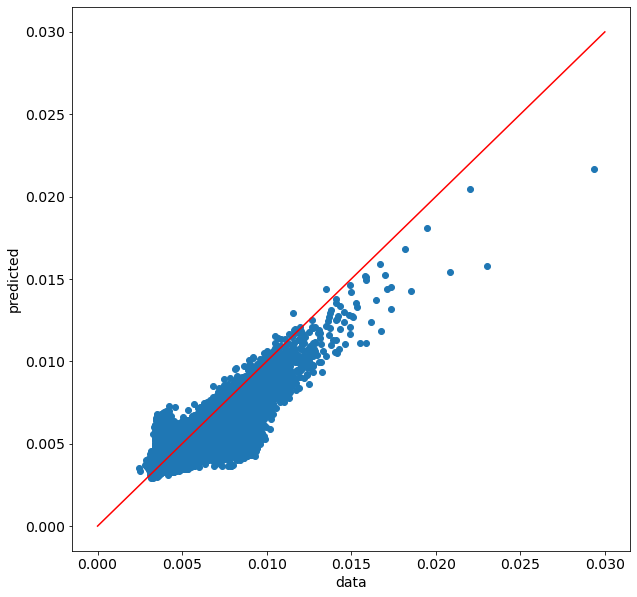

In [147]:
plt.scatter(data['ep'],predicted)
plt.plot(x,x,color='r')
plt.ylabel('predicted')
plt.xlabel('data')

we can see here that it is almost linear along x and y but however is too wide and the y values are a bit lower than they should be as its been shifted down so the predicted values are less than they should be and there is a bit of spread. This can be improved perhaps by a wider model.

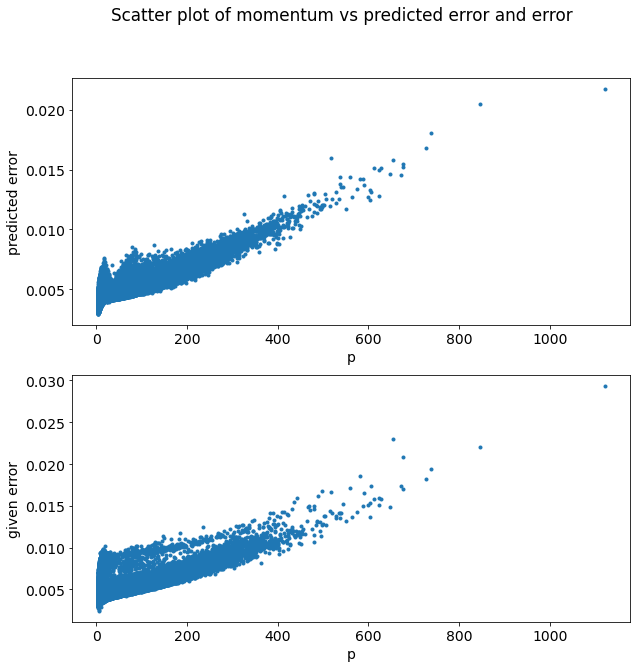

In [140]:
fig, axs = plt.subplots(2)
fig.suptitle('Scatter plot of momentum vs predicted error and error')
axs[0].scatter(data['p'],predicted,marker='.')

axs[0].set_xlabel('p')
axs[1].set_xlabel('p')
axs[0].set_ylabel('predicted error')
axs[1].set_ylabel('given error')
axs[1].scatter(data['p'],data['ep'],marker='.')

plt.show()

Here you can see the two graphs are similar however predicted error does not give these clear distinguishing branches as observed with given error against p.